In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Mnist Dataset (Provided by Keras)

In [2]:
 (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

Visualise a sample

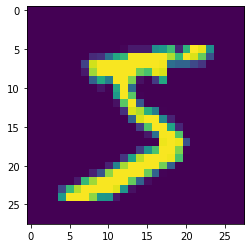

In [3]:
 plt.imshow(x_train[0])

Check that the shapes are what we expected

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

# Preprocessing

In [5]:
x = np.reshape(x_train, [-1, 28 * 28])              # flatten
y = tf.keras.utils.to_categorical(y_train, 10)      # one-hot

xt = np.reshape(x_test, [-1, 28 * 28])              # flatten
yt = tf.keras.utils.to_categorical(y_test, 10)      # one-hot

In [6]:
x.shape, y.shape

((60000, 784), (60000, 10))

In [7]:
x = x / 255         # normalise
xt = xt / 255       # normalise

# Build the Model

In [8]:

layer_32hu1 = tf.keras.layers.Dense(32)
layer_32hu2 = tf.keras.layers.Dense(32)
output_layer_10class = tf.keras.layers.Dense(10)

t_in = tf.keras.Input((784))
t = layer_32hu1(t_in)
t = tf.nn.relu(t)
t = layer_32hu2(t)
t = tf.nn.relu(t)
t = output_layer_10class(t)
t_out = tf.nn.softmax(t)
model = tf.keras.Model(t_in, t_out)


In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'])

# Sanity Check

In [10]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
tf_op_layer_Relu (TensorFlow [(None, 32)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
tf_op_layer_Relu_1 (TensorFl [(None, 32)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
_________________________________________________________________
tf_op_layer_Softmax (TensorF [(None, 10)]             

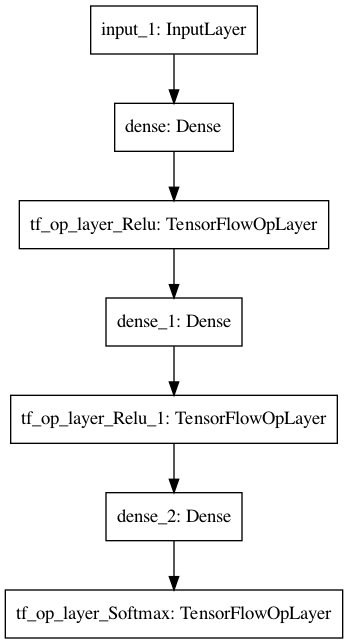

In [11]:
tf.keras.utils.plot_model(model)

# Training the Model

In [12]:
model.fit(x, y, validation_data=(xt, yt), batch_size=32, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 1s 761us/step - loss: 0.3511 - acc: 0.8978 - val_loss: 0.1986 - val_acc: 0.9417
Epoch 2/100
1875/1875 [==============================] - 1s 713us/step - loss: 0.1742 - acc: 0.9495 - val_loss: 0.1448 - val_acc: 0.9559
Epoch 3/100
1875/1875 [==============================] - 1s 725us/step - loss: 0.1354 - acc: 0.9599 - val_loss: 0.1393 - val_acc: 0.9588
Epoch 4/100
1875/1875 [==============================] - 1s 716us/step - loss: 0.1136 - acc: 0.9664 - val_loss: 0.1204 - val_acc: 0.9615
Epoch 5/100
1875/1875 [==============================] - 1s 664us/step - loss: 0.0977 - acc: 0.9700 - val_loss: 0.1142 - val_acc: 0.9642
Epoch 6/100
1875/1875 [==============================] - 1s 659us/step - loss: 0.0855 - acc: 0.9742 - val_loss: 0.1090 - val_acc: 0.9672
Epoch 7/100
1875/1875 [==============================] - 1s 693us/step - loss: 0.0769 - acc: 0.9758 - val_loss: 0.1177 - val_acc: 0.9647
Epoch 8/100
1802/1875 [==================

KeyboardInterrupt: 